In [60]:
%matplotlib notebook
import numpy as np
np.random.seed(13)

# CBOW Model
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils.data_utils import get_file
from keras.utils import np_utils
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from sklearn.metrics import pairwise_distances

# importing all necessary modules 
import numpy as np
import warnings 
import pandas as pd

#Build the corpus vocabulary
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

from scipy import spatial
import operator

# Need the interactive Tools for Matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [61]:
#-----Files-----
# variants.dat eg. ['22', 'T', 'ENSG00000239435', 'intron_variant,non_coding_transcript_variant', 'AF=1', 'C']
# variants_ids.dat numerical representation of variants [0, 1, 4, 64, 5]
# rs.dat ['rs1110', 'rs22221', 'rs31245']

import os

def delete_file(filename):  #Give a file to delete it
    ## If file exists, delete it ##
    if os.path.isfile(filename):
        os.remove(filename)
    else:    ## Show an error ##
        print("Error: %s file not found\n" % filename)

def save_variants(filename='variants.dat', array=[]): #Store 2d array of variants to file
    file = open(filename, 'w')
    #file.write(repr(precious_data))
    for dat in array:
        for val in dat:
            file.write(str(val))
            file.write(' ')
        file.write("\n")
    file.close()
    
def append_variants(filename='variants.dat', array=[]): #Append to variant file one variant
    file = open(filename, 'a')
    for val in array:
        file.write(str(val))
        file.write(' ')
    file.write("\n")
    file.close()

def save_variants_ids(filename='variants_ids.dat', array=[]): #Store 2d array of variants_ids to file
    file = open(filename, 'w')
    for dat in wids:
        for val in dat:
            file.write(str(val)+' ')
        file.write("\n")
    file.close()
    
def append_variants_ids(filename='variants_ids.dat', array=[]): #Append to variant ids file one variant
    file = open(filename, 'a')
    for val in array:
        file.write(str(val))
        file.write(' ')
    file.write("\n")
    file.close()

def append_rs(filename='rs.dat', rs=''): #Append a rs id to file
    file = open(filename, 'a')
    file.write(str(rs))
    file.write("\n")
    file.close()
    
def load_variants(filename='variants.dat', fileline=0, step=10): #Load variant from file to var from line with step
    dat = []
    fp = open(filename, 'r')
    for i, line in enumerate(fp):
        if (i >= fileline):
            if (i < fileline+step):
                dat.append( line.strip().split(' ') )
        elif (i >= fileline+step):
                break;
    fp.close()
    return dat


def load_rs(filename='variants.dat', fileline=0, step=10): #Load variant from file to var from line with step
    dat = []
    fp = open(filename, 'r')
    for i, line in enumerate(fp):
        if (i >= fileline):
            if (i < fileline+step):
                dat.append( line.strip() )
        elif (i >= fileline+step):
                break;
    fp.close()
    return dat
    
def load_variant_ids(filename='snips_ids.dat', fileline=0, step=10): #Load variant to number represantion from file to var from line with step
    dat = []
    fp = open(filename, 'r')
    for i, line in enumerate(fp):
        if (i >= fileline):
            if (i < fileline+step):
                dat.append( list(map(int, line.strip().split(' ') )) )
            elif (i >= fileline+step):
                break;
    fp.close()
    return dat

In [62]:
def rsAF(af):
    af = float(af.split('=')[1])
    
    if(af < 0.001):
        return 'AF=0'
    elif(af < 0.01):
        return 'AF=1'
    elif(af < 0.5):
        return 'AF=2'
    elif(af < 1):
        return 'AF=3'
    else:
        return 'AF=4'

rsAF('AF=1.0')

'AF=4'

In [64]:
delete_file('variants.dat')
delete_file('rs.dat')
delete_file('variants_ids.dat')

def load_fasta(filename):
    #Get Columns Name
    columns = list()
    extra_columns = list()
    
    two_dim_data = list()
    
    fp = open(filename, 'r')
    for i, line in enumerate(fp):
        
        if(i<96):
            continue
        elif(i == 96): #Columns names
            columns = line.strip().split('\t')
        
        elif( i>=38 and i<96 ): #Extra columns names
            extra_columns.append( line.split(':')[0].split('## ')[1].strip() )
            print( line )
        
        elif(i>96):  #Remome 'and i<number' for reead the whole file
            variant = line.split('\t')
            extra = variant[13].strip().split(';')
            #two_dim_data.append(line.split('\t'))
            try:
                af = [a for a in extra if ('AF=' in a) and ('_AF=' not in  a) ]
                given_ref = [ref for ref in extra if 'GIVEN_REF=' in ref][0]
                if(extra[4] == 'SYMBOL_SOURCE=HGNC'):
                    if( 'downstream_gene_variant' in variant[6] or 'intron_variant' in variant[6] ):
                        if(len(af) == 1):
                            if ( len(extra[8].split('=')[1]) ):
                                if (len(variant[1])>2 ):
                                    temp = [variant[1].split(':')[0], variant[2], variant[3], variant[4],variant[6], variant[2], rsAF(af[0]), extra[8], given_ref ]
                                    append_variants(filename='variants.dat', array=temp)
                                    append_rs(filename='rs.dat', rs=variant[0])
                                    #two_dim_data.append(temp)

            except Exception:
                pass  # or you could use 'continue'
            
        else:
            break

    fp.close()
    return columns, extra_columns, two_dim_data

columns, extra_columns, two_dim_data = load_fasta('data/chromosomes/chr22/chr22.fasta')

print(columns)
print('Length: ',len(columns))
print('\n')
print(extra_columns)

#df = pd.DataFrame(two_dim_data,
# columns=columns)

#df.iloc[:10]

Error: variants_ids.dat file not found

['#Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'Extra']
Length:  14


[]


In [66]:
#variants = load_variants(filename='variants.dat', fileline=0, step=100)
#rs = load_rs(filename='rs.dat', fileline=0, step=100)
#df = pd.DataFrame(rs)

vocabulary = {}
rs = []
variants = []

step = 5000 #Step per lines
size = 1 #Fixed don't change!
counter = 0
while (size > 0):
    variants = load_variants(filename='variants.dat', fileline=counter, step=step)
    rs.extend( load_rs(filename='rs.dat', fileline=counter, step=step) )
    
    #Build vocabulary
    for variant in variants:
        for value in variant:
            vocabulary[value] = None #variant word as key
    
    size = len(variants)
    counter += size
    #print('----> Size: ',size, '-', rs)
    

vocabulary = list(vocabulary.keys()) #Only keys as list

var2id = {v:k for k,v in enumerate(vocabulary)} 
#print(var2id)

id2var = {v:k for k, v in var2id.items()}

In [68]:
wid = [] #Dont touch it!
step = 6000 #Step per lines
size = 1 #Fixed don't change!
counter = 0
while (size > 0):
    variants = load_variants(filename='variants.dat', fileline=counter, step=step)
    
    #Build variant as numerical representation
    for variant in variants:
        temp = []
        #print(variant)
        for value in variant:
            temp.append(var2id[value])
        #wids.append(temp)
        wid = temp
        append_variants_ids('variants_ids.dat', wid)
        #print(temp)
        
    size = len(variants)
    counter += size
    #print('----> Size: ',size, '-', rs)
    

In [69]:
#wids = [[ print(word2id[w]) for w in word] for word in data2 ]
#print('\n\n\nWIDS--->', wids)
print('Word with id (19):',id2var[6])
print('---------------')
#pdata = sequence.pad_sequences(word2index, maxlen=5)

vocab_size = len(rs)
embed_size = 100
window_size = len(wid)

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(var2id.items())[:3])
print('Windows Size', window_size)

Word with id (19): SOURCE=Ensembl
---------------
Vocabulary Size: 1083881
Vocabulary Sample: [('22', 0), ('G', 1), ('ENSG00000184624', 2)]
Windows Size 9


In [44]:
len(var2id.keys())

204

In [56]:
#print('-----my_Wid-----\n',my_wid)
#print('-----my_Word2Id-----\n',my_word2id)
#print('-----my_id2word-----\n', my_id2word.items())
print('ID2WORD[n]:',id2var[4])

#rs = np.array(rs)

def generate_data():
    #wids2 = list()
    total_rs = len(rs)

    step = 1 #Step per lines
    size = 1 #Fixed don't change!
    counter = 0
    for counter in range(0, total_rs):
        wid = load_variant_ids(filename='variants_ids.dat', fileline=counter, step=step)
        
        #print(wid)
        x = np.array(  wid   )
        y = np.array( [ np_utils.to_categorical(counter, total_rs) ]  )
        
        size = len(wid)
        
        
        yield x, y
    
'''
# Test this out for some samples
i = 0
for x, y in generate_data():
        print(x.shape)
        print(y.shape)
        print('Context (X):', x, '-> Target (Y):', rs[np.argwhere(y[0])[0][0]] )
        
        #if i == 2:
            ##break
        i += 1
'''

ID2WORD[n]: intron_variant,non_coding_transcript_variant


"\n# Test this out for some samples\ni = 0\nfor x, y in generate_data():\n        print(x.shape)\n        print(y.shape)\n        print('Context (X):', x, '-> Target (Y):', rs[np.argwhere(y[0])[0][0]] )\n        \n        #if i == 2:\n            ##break\n        i += 1\n"

In [46]:
#!pip install pydot
#!pip install graphviz 
#!pip install pydotplus
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size ))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 9, 100)            757900    
_________________________________________________________________
lambda_2 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7579)              765479    
Total params: 1,523,379
Trainable params: 1,523,379
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_data():
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

Epoch: 1 	Loss: 68222.14051914215

Epoch: 2 	Loss: 67130.94238185883

Epoch: 3 	Loss: 62803.87645339966

Epoch: 4 	Loss: 58246.61093568802

Epoch: 5 	Loss: 56310.9278011322



In [48]:
import pandas as pd
weights = cbow.get_weights()[0]
#weights = weights[1:]
print(weights.shape)

#df = pd.DataFrame(weights)
df = pd.DataFrame(weights, index=list(rs))
#df = df.iloc[:vocab_size-2]

#print(df.loc['rs555563486'])
#print(df.loc['rs545181219'])
wv = pd.DataFrame(weights, index=list(rs))
#wv.loc['rs555563486'].values[0]

(7579, 100)


In [49]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:6]+1] 
                   for search_term in ['rs562138345', 'rs117836313', 'rs531323657', 'rs549847104']}

print(similar_words)

(7579, 7579)
{'rs562138345': ['rs547988671', 'rs549137986', 'rs563320830', 'rs549137986', 'rs549137986'], 'rs117836313': ['rs79592372', 'rs376150245', 'rs12167475', 'rs146840462', 'rs9606161'], 'rs531323657': ['rs5992601', 'rs3020744', 'rs544413992', 'rs564052603', 'rs563773695'], 'rs549847104': ['rs546318458', 'rs536074485', 'rs182947229', 'rs550629225', 'rs562579560']}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [50]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:6]+1] 
                   for search_term in ['rs562138345', 'rs117836313', 'rs531323657', 'rs549847104']}

print(similar_words)

#distance_matrix[rs.index('rs549847104')].argsort()[:3]+1  #Id of 3 first rs
#distance_matrix[rs.index('rs549847104') ]

#print( distance_matrix[ rs.index('rs562138345') ] )
#print( distance_matrix[rs.index('rs549847104')].argsort()[:3]+1)

def find_similar_words(word, output=6):
    similar_words = {search_term: [rs[idx] for idx in distance_matrix[rs.index(search_term)].argsort()[1:output]+1] 
                       for search_term in [word]}
    return list(similar_words.values())[0]
    
print( find_similar_words('rs562138345', output=5 ) )
print('\n')

def find_similar_words_tuple(word, output=6):
    similar_words = {search_term: [(rs[idx], distance_matrix[rs.index(search_term)][idx]) for idx in distance_matrix[rs.index(search_term)].argsort()[1:output]+1] 
                       for search_term in [word]}
    return list(similar_words.values())[0]

print( find_similar_words_tuple('rs562138345', output=5 ) )

(7579, 7579)
{'rs562138345': ['rs547988671', 'rs549137986', 'rs563320830', 'rs549137986', 'rs549137986'], 'rs117836313': ['rs79592372', 'rs376150245', 'rs12167475', 'rs146840462', 'rs9606161'], 'rs531323657': ['rs5992601', 'rs3020744', 'rs544413992', 'rs564052603', 'rs563773695'], 'rs549847104': ['rs546318458', 'rs536074485', 'rs182947229', 'rs550629225', 'rs562579560']}
['rs547988671', 'rs549137986', 'rs563320830', 'rs549137986']


[('rs547988671', 2.2904289), ('rs549137986', 2.3418906), ('rs563320830', 2.354982), ('rs549137986', 2.2758346)]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [51]:
from scipy import spatial


def words_similarity(word1, word2):
    return 1 - spatial.distance.cosine(weights[ rs.index(word1) ], weights[ rs.index(word2) ])

words_similarity('rs146908746', 'rs527958048')

print(words_similarity('rs117205378', 'rs565508803'))

'''
for x in similar_words.keys():
    print('-------',x,'------')
    for y in similar_words[x]:
        print(y,': ', words_similarity(x, y) )
''' 
    

import operator

def spartial_distance(word, output=6):
    spartial = []
    for x in rs:
        if (x is not word):
            similarity = words_similarity(word,x)
            spartial.append( (x, abs(similarity) ) )
    #spartial = np.array(spartial)
    spartial.sort(key=operator.itemgetter(1))
    return spartial[:output]

#word = 'rs117205378'


spartial_distance('rs58293274', 6)

-2.167555948062727e-07


[('rs116841791', 1.0749335160653573e-05),
 ('rs116841791', 1.0749335160653573e-05),
 ('rs116841791', 1.0749335160653573e-05),
 ('rs2845358', 4.528291174210608e-05),
 ('rs187361257', 7.987603748915717e-05),
 ('rs187361257', 7.987603748915717e-05)]

In [59]:
from itertools import combinations

min((abs(words_similarity(x,y)), x, y) for x,y in combinations(rs, 2))

In [219]:
a = [1,2,3,4]
min([(x+y, x, y) for x,y in combinations(a,2)])

(3, 1, 2)

In [298]:
min((11,1,3),(11,2,3))

(11, 1, 3)

<IPython.core.display.Javascript object>


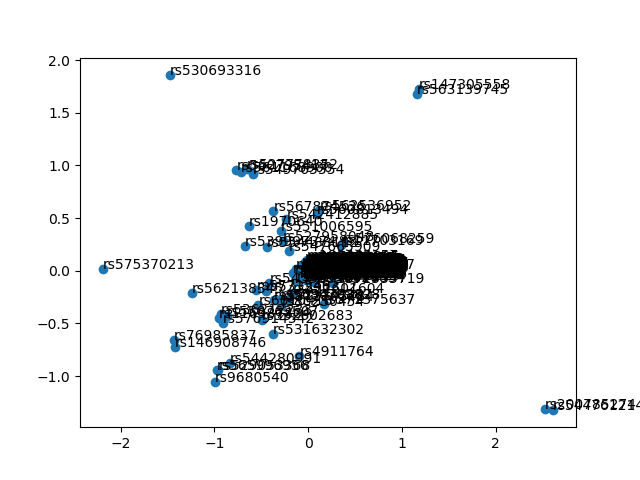

In [140]:
# Import modules
from sklearn.decomposition import PCA
from matplotlib import pyplot

num_of_words = None   # Limit the pca words or type None

X = df.iloc[:num_of_words]
#print('---X--> {}'.format(X[:10]))

# PCA tranformation
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.figure(1)
pyplot.scatter(result[:, 0], result[:, 1])
words = df.index
words = words[:num_of_words]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    #print('--> Word: {} XY: {}, {}'.format(word, result[i, 0], result[i, 1]))   # prints the word and position
    #print('--> Word: {} - Data: {} - XY: {}, {}'.format(word, precious_data[i], result[i, 0], result[i, 1]))
#pyplot.show()


<IPython.core.display.Javascript object>


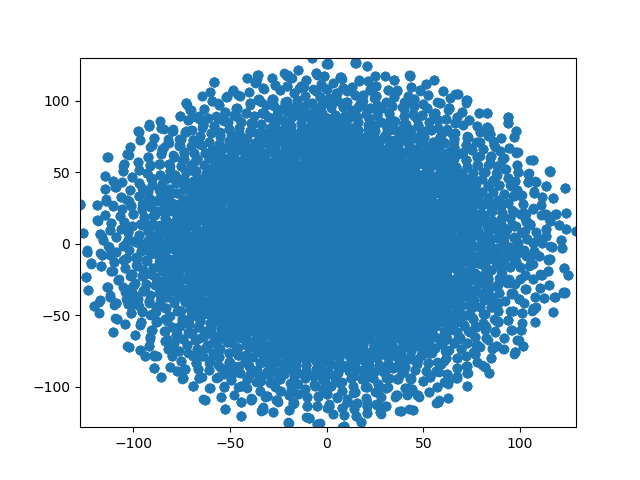

In [54]:
from sklearn.metrics import pairwise_distances
distances = distance_matrix

# Need the interactive Tools for Matplotlib

import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE


def display_closestwords_tsnescatterplot(model, word, output=6):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = spartial_distance(word, output)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([ model.get_weights()[0][rs.index(word)] ]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.get_weights()[0][rs.index(wrd_score[0])]
        #wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0, metric="cosine")
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate('', xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    

plt.figure(4)
display_closestwords_tsnescatterplot(cbow, 'rs58293274', None)

In [1354]:
'''
#print(test)
#test = pyspark.read.text("chr22_data.pickle")

import multiprocessing as mp
from math import cos
import time

p = mp.Pool(4)

t0 = time.time()
p.map(cos, range(1000))
t1 = time.time()

total = t1-t0
print(total)

from sys import getsizeof

print( getsizeof(precious_data)/1000 )
print( getsizeof(wids)/1024 )
print( getsizeof(test)/1024 )
'''

SyntaxError: non-default argument follows default argument (<ipython-input-1354-bc19639ce33e>, line 20)

In [1372]:

save_variants();
var = load_variants(filename='variants.dat', fileline=0, step=5)[:]
print(len(var))
size = len(var)
print(var)

var = load_variants(filename='variants.dat', fileline=size, step=10)[:]
print(len(var))
size = len(var)
print(var)

save_snips_ids();
var = load_variant_ids(filename='snips_ids.dat', fileline=0, step=3)
print( var[0][2] )

print(var)

5
[['22', 'G', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'G', 'AF=1', 'SOURCE=Ensembl', 'GIVEN_REF=A'], ['22', 'C', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'C', 'AF=3', 'SOURCE=Ensembl', 'GIVEN_REF=G'], ['22', 'T', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=3', 'SOURCE=Ensembl', 'GIVEN_REF=A'], ['22', 'C', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'C', 'AF=3', 'SOURCE=Ensembl', 'GIVEN_REF=G'], ['22', 'A', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=1', 'SOURCE=Ensembl', 'GIVEN_REF=G']]
10
[['22', 'A', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'A', 'AF=1', 'SOURCE=Ensembl', 'GIVEN_REF=C'], ['22', 'T', 'ENSG00000184624', 'ENST00000425869', 'intron_variant,non_coding_transcript_variant', 'T', 'AF=0', 'SOURCE=Ense

In [919]:
class var2vec:
    variants = []
    snips = []
    embedding_size = 100
    window_size = 0
    vocab_size = 0
    
    vocabulary = {}
    id2var = {}
    var2id = {}
    wids = []
    
    cbow = None
    weights = None
    wv = {}
                    
    
    def __init__(self, data, rs):
        
        self.variants, self.snips = zip(*sorted(zip(data, rs)))
        
        #print(self.variants)
        #print(self.snips)
        #self.variants = data
        #self.snips = rs
        rs = []
        data = []
        
        temp = []
        counter = 0
        for d in self.variants:
            for v in d:
                self.vocabulary[v] = 1
        
        
        for k,v in enumerate( list(self.vocabulary.keys()) ):
            self.var2id[v] = counter
            self.id2var[k] = v
            counter +=1
            
        for d in self.variants:
            for v in d:
                temp.append(self.var2id[v])
            self.wids.append(temp)
            temp = []
        
        self.vocab_size = len(self.snips) #Total rs
        self.window_size = len(self.wids[0]) #Length of wids[0]
        self.embedding_size = 100
        
        self.cbow = self.build_cbow_model()
        #self.modelSummary()
        self.train()

        
    def generate_data(self):
        total = len(self.snips)
        for i in range(0, total):
            x = np.array( [ self.wids[i] ] )
            y = np.array( [ np_utils.to_categorical(i, total) ]  )
            #print(x,y)
            yield x, y
        
        
    def build_cbow_model(self):
        # build CBOW architecture
        cbow = Sequential()
        cbow.add(Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.window_size ))
        cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(self.embedding_size,)))
        cbow.add(Dense(self.vocab_size, activation='softmax'))
        cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
        self.weights = cbow.get_weights()[0]
        self.wv = {rs[i]:vector for i, vector in enumerate(cbow.get_weights()[0]) }
        return cbow
    
    
    def train(self):
        for epoch in range(1, 6):
            loss = 0.
            i = 0
            for x, y in self.generate_data():
                i += 1
                loss += self.cbow.train_on_batch(x, y)
                if i % 100000 == 0:
                    print('Processed {} (context, word) pairs'.format(i))
        
    
    def getVar2id(self):
        return self.var2id
    
    def getId2var(self):
        return self.id2var
    
    def getWids(self):
        return self.wids
    
    def dataframe(self):
        import pandas as pd
        # Pandas dataframe all data
        df = pd.DataFrame(self.variants, self.snips)
        return df
        
    def modelSummary(self):
        print(self.cbow.summary())
        
    def embeddingFrame(self):
        import pandas as pd
        weight = self.cbow.get_weights()[0]
        #print(weights.shape)
        embeddingFrame = pd.DataFrame(weight, index=list(self.snips))
        return embeddingFrame
    
        
    def words_similarity(self, word1, word2):
        return 1 - spatial.distance.cosine(wids[ self.snips.index(word1) ], wids[ self.snips.index(word2) ])

    def spartial_distance(self, word, output=6):
        spartial = []
        for x in self.snips:
            if (x is not word):
                similarity = self.words_similarity(word,x)
                spartial.append( (x, abs(similarity) ) )
        #spartial = np.array(spartial)
        spartial.sort(key=operator.itemgetter(1))
        return spartial[:output]
    
    def euclidean_distance(self, word, output=6):
        # compute pairwise distance matrix
        distance_matrix = euclidean_distances( weights )
        print(distance_matrix)
        similar_words = {search_term: [(self.snips[idx], distance_matrix[self.snips.index(search_term)][idx]) for idx in distance_matrix[self.snips.index(search_term)].argsort()[1:output]+1] 
                           for search_term in [word]}
        return list(similar_words.values())[0]
    
    def display_closestwords_tsnescatterplot(self, word, output=6):
        model = self.cbow
        
        arr = np.empty((0,100), dtype='f')
        word_labels = [word]

        # get close words
        close_words = self.spartial_distance(word, output)

        # add the vector for each of the closest words to the array
        arr = np.append(arr, np.array([ model.get_weights()[0][self.snips.index(word)] ]), axis=0)
        for wrd_score in close_words:
            wrd_vector = model.get_weights()[0][self.snips.index(wrd_score[0])]
            #wrd_vector = model.wv[wrd_score[0]]
            word_labels.append(wrd_score[0])
            arr = np.append(arr, np.array([wrd_vector]), axis=0)

        # find tsne coords for 2 dimensions
        tsne = TSNE(n_components=2, random_state=0)
        np.set_printoptions(suppress=True)
        Y = tsne.fit_transform(arr)

        x_coords = Y[:, 0]
        y_coords = Y[:, 1]
        # display scatter plot
        plt.scatter(x_coords, y_coords)

        for label, x, y in zip(word_labels, x_coords, y_coords):
            plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.figure(1)
        plt.show()
        
    def pca(self, output=6):
        num_of_words = output   # Limit the pca words or type None

        X = self.embeddingFrame().iloc[:num_of_words]
        #print('---X--> {}'.format(X[:10]))

        # PCA tranformation
        pca = PCA(n_components=2)
        result = pca.fit_transform(X)

        # Create a scatter plot of the projection
        pyplot.figure(100)
        pyplot.scatter(result[:, 0], result[:, 1])
        words = self.snips
        words = words[:num_of_words]
        for i, word in enumerate(words):
            pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

            pyplot.show()

<IPython.core.display.Javascript object>


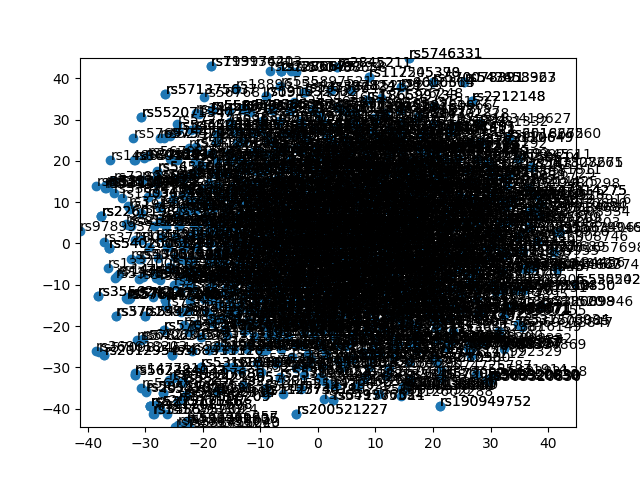

In [921]:
var2vec = var2vec(precious_data, rs)
#var2vec.variants
#print(var2vec.getVar2id() )
#print(var2vec.getId2var())
#print(var2vec.wids)

#var2vec.dataframe()
#var2vec.embeddingFrame()

#print('Euclidean Dist: ', var2vec.euclidean_distance('rs22') )
#print(var2vec.spartial_distance('rs58293274'))
var2vec.display_closestwords_tsnescatterplot('rs58293274', None)

#var2vec.embeddingFrame()

#var2vec.pca()

In [922]:
var2vec.wv[var2vec.snips[0]]

array([-0.01364731, -0.03569822, -0.04593316, -0.02947996,  0.00345299,
        0.04879535, -0.02479637, -0.03795122, -0.02459383,  0.01250378,
       -0.02648737,  0.02170729,  0.03049809, -0.02713004, -0.01792134,
       -0.01195217,  0.02372089, -0.02394441, -0.04729397,  0.02084661,
       -0.00029944, -0.01458911, -0.02152156,  0.04199294, -0.04962754,
        0.04506147,  0.01274172, -0.04760127,  0.04181036, -0.04636451,
       -0.0070911 , -0.02318423, -0.00968026,  0.01991451,  0.00616101,
       -0.04899808, -0.04237852,  0.0144222 ,  0.03806804, -0.04218906,
        0.0231542 ,  0.00206771, -0.00544054, -0.04750059, -0.04815533,
        0.04748715, -0.04313007, -0.00765871,  0.02703377, -0.04141356,
        0.01053916, -0.0394662 , -0.01202292, -0.03861962,  0.04961037,
       -0.01599373, -0.04660212, -0.02607586, -0.02487637,  0.03826792,
        0.01135148, -0.00269916,  0.04928685, -0.04603971,  0.0113818 ,
        0.00936216,  0.00487613, -0.0179444 ,  0.02055745, -0.02